In [7]:

import numpy as np

# fake_data_file.npy
file_path = '/home/rzhou/Projects/Diffusion-TS/OUTPUT/rounD_map02-08_interval100_seq500_reduced_nfea30/ddpm_fake_rounD_map02-08_interval100_seq500_reduced_nfea30.npy'

# 使用numpy的load函数读取npy文件
fake_data_norm = np.load(file_path)

# 现在，变量data包含了npy文件中的数据
# 你可以打印数据来查看内容，或者进行其他操作
print(fake_data_norm[0])

[[7.70208895e-01 3.02419037e-01 5.56293726e-01 ... 9.99686718e-01
  1.13964081e-04 1.00000000e+00]
 [7.68554598e-01 3.05425644e-01 5.54794788e-01 ... 9.99555171e-01
  1.82017684e-03 1.00000000e+00]
 [7.67131954e-01 3.09669197e-01 5.55263698e-01 ... 9.99687761e-01
  1.63733959e-03 1.00000000e+00]
 ...
 [1.04123354e-03 1.00000000e+00 6.33776188e-04 ... 9.98593688e-01
  0.00000000e+00 9.99401510e-01]
 [1.12497807e-03 1.00000000e+00 5.80728054e-04 ... 9.98535931e-01
  0.00000000e+00 9.99507129e-01]
 [7.29262829e-04 9.99792546e-01 2.31862068e-05 ... 9.96470541e-01
  0.00000000e+00 1.00000000e+00]]


In [8]:
print(fake_data_norm.shape)
print(fake_data_norm[0].shape)

(2000, 500, 30)
(500, 30)


In [3]:
#MinMaxScaler renormalization (with extrem value as padding value)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer
df = pd.read_csv("/DATA1/rzhou/ika/multi_testcases/rounD/reduced/nfea30/rounD_map02-08_interval100_seq500_reduced_nfea30.csv", header=0)
data = df.values

# 定义一个极端的填充值
extreme_value = -300
# 替换所有为0的值
data[data == 0] = extreme_value

scaler = MinMaxScaler()
scaler = scaler.fit(data[:,1:])
seq_length=500
num_feature=30
fake_data=scaler.inverse_transform(fake_data_norm.reshape(-1, num_feature)).reshape(-1, seq_length, num_feature)

# 将所有绝对值小于10的元素替换为0
#fake_data[np.abs(fake_data) < 5] = 0
fake_data[fake_data < -200] = 0

# 验证替换结果
fake_data[:1]  # 展示处理后的第一个样本以减少输出量

array([[[ 78.82591413, -27.90099007,  62.15538053, ...,   0.        ,
           0.        ,   0.        ],
        [ 78.43954356, -27.61027747,  60.7210601 , ...,   0.        ,
           0.        ,   0.        ],
        [ 78.20415428, -27.74161695,  60.32561069, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ..., -32.90696801,
         105.59162218, -45.90526491],
        [  0.        ,   0.        ,   0.        , ..., -33.2742246 ,
         105.62697652, -45.40613054],
        [  0.        ,   0.        ,   0.        , ..., -34.67581092,
         105.22560311, -45.37182387]]])

In [9]:
#MinMaxScaler renormalization (0 as padding value)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer
df = pd.read_csv("/DATA1/rzhou/ika/multi_testcases/rounD/reduced/nfea30/rounD_map02-08_interval100_seq500_reduced_nfea30.csv", header=0)
data = df.values

scaler = MinMaxScaler()
scaler = scaler.fit(data[:,1:])
seq_length=500
num_feature=30
fake_data=scaler.inverse_transform(fake_data_norm.reshape(-1, num_feature)).reshape(-1, seq_length, num_feature)

# 将所有绝对值小于10的元素替换为0
fake_data[np.abs(fake_data) < 10] = 0

# 验证替换结果
fake_data[:1]  # 展示处理后的第一个样本以减少输出量

array([[[110.10621389, -58.15620879,  79.38372662, ...,   0.        ,
           0.        ,   0.        ],
        [109.86972169, -57.90555275,  79.16982657, ...,   0.        ,
           0.        ,   0.        ],
        [109.66634582, -57.55177455,  79.23674051, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]])

In [5]:
#optional,有需求的话可以打出来看一眼
df_single = pd.DataFrame(fake_data[0])
df_single.to_csv("check_faka_data.csv", index=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


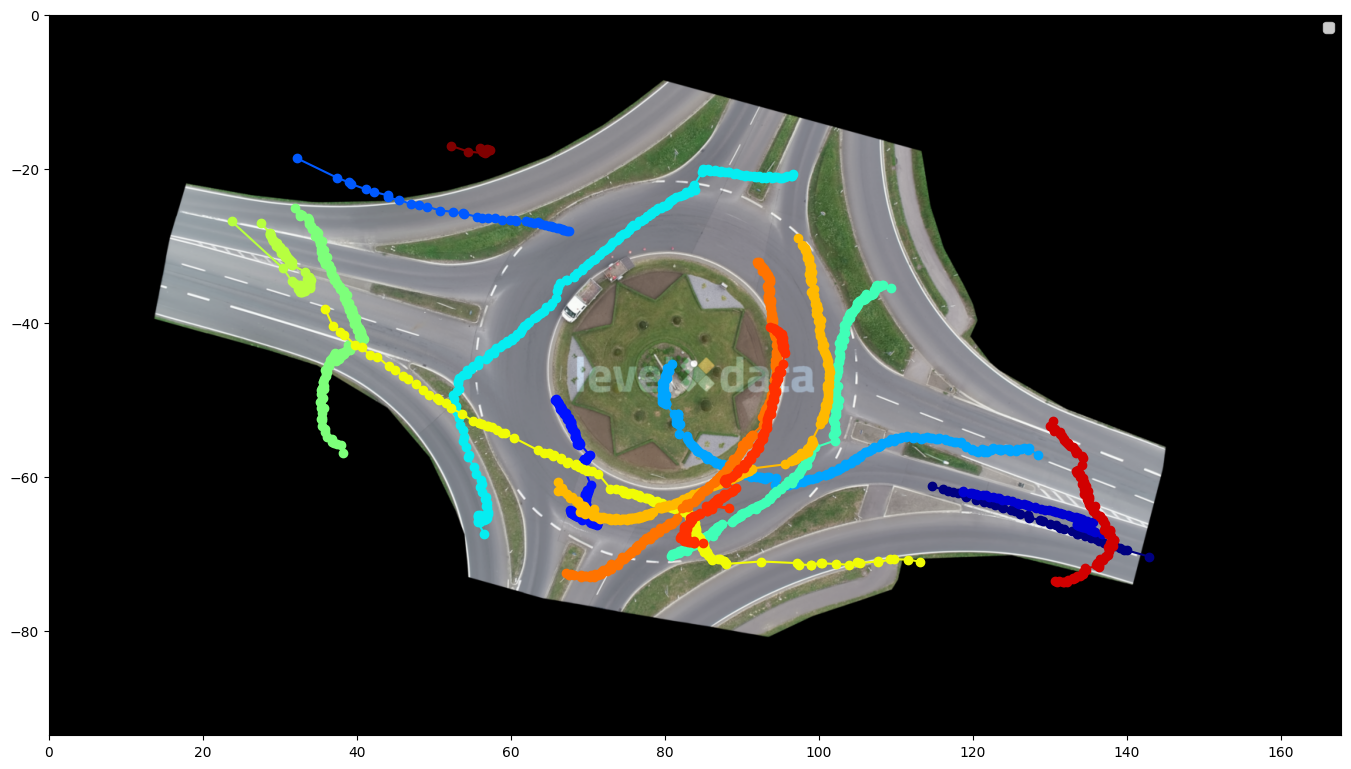

In [11]:
#画轨迹的静态图 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 载入背景图片
#bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'  
bg_image_path = '/DATA1/rzhou/ika/rounD/data/02_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size

# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)

# 创建图形和轴，使用图像的原始尺寸
fig, ax = plt.subplots(figsize=figsize)


# 设置坐标轴的范围
ax.set_xlim(0, width/10)
ax.set_ylim(-height/10, 0)
# 加载并显示背景图
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, width/10, -height/10, 0])


num_tracks = 15  # 假设有num_tracks个轨迹
colors = plt.cm.jet(np.linspace(0, 1, num_tracks))  # 生成颜色

for i in range(num_tracks):
    # 提取每个轨迹的x和y坐标
    x = fake_data[111][:, i * 2]  # 偶数列为x坐标
    y = fake_data[111][:, i * 2 + 1]  # 奇数列为y坐标
    
    # 过滤出非零点
    nonzero_indices = (x != 0) & (y != 0)
    x_filtered = x[nonzero_indices]
    y_filtered = y[nonzero_indices]

    # 绘制轨迹
    ax.plot(x_filtered, y_filtered, marker='o', linestyle='-', color=colors[i])  # 移除了label参数，以避免图例过于拥挤

# 添加图例
ax.legend()

plt.show()


555


/tmp/ipykernel_453273/1881559705.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


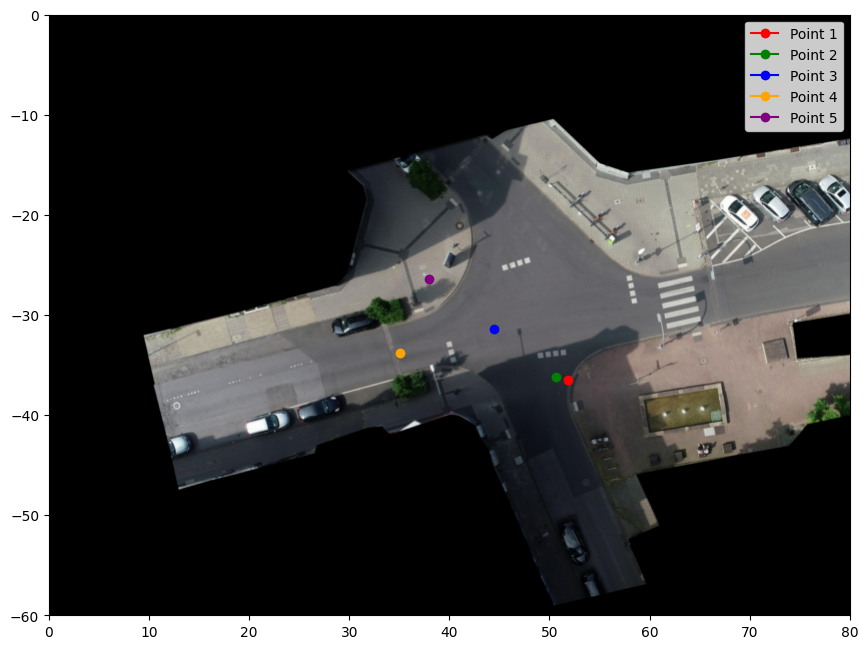

In [22]:
#动画 5个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 fake_data 是一个形状为 (2001, 100, 10) 的数组
# 这里你需要加载你的真实数据
# fake_data = ...

# 随机选择一个元素而不是固定的 330
random_index = random.randint(0, fake_data.shape[0] - 1)
#random_index=111
print(random_index)

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
fig, ax = plt.subplots(figsize=(11.7, 7.8))
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

colors = ['red', 'green', 'blue', 'orange', 'purple']
lines = [ax.plot([], [], marker='o', linestyle='-', color=colors[i], label=f'Point {i+1}')[0] for i in range(5)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        x = fake_data[random_index][i, j*2]
        y = fake_data[random_index][i, j*2+1]
        line.set_data(x, y)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=250, interval=40, blit=True)

plt.legend()

# 保存动画为MP4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_18-29_interval250/samples/19map/{random_index}.mp4', writer=writer)


In [13]:
#动画, 多个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random
from PIL import Image

# 假设 fake_data 是一个形状为 (num_cases, 1500, 60) 的数组
# 生成1个case
# random_index = random.randint(0, fake_data.shape[0] - 1)
# #random_index = 111
# print(f"Random index: {random_index}")

# 生成多个case
num_cases=5
random_indices = np.random.choice(fake_data.shape[0], num_cases, replace=False)
print(f"Random indices: {random_indices}")

num_v=50

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/rounD/data/06_background.png'
#bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size
# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)

#设置num_v个颜色
colors = plt.cm.jet(np.linspace(0, 1, num_v))


for random_index in random_indices:
    # 创建图形和轴，使用图像的原始尺寸
    fig, ax = plt.subplots(figsize=figsize)
    bg_img = plt.imread(bg_image_path)
    # inD-19
    # ax.set_xlim(0, 80)
    # ax.set_ylim(-60, 0)
    # ax.imshow(bg_img, extent=[0, 117, -78, 0])

    # rounD-02
    ax.set_xlim(0, 170)
    ax.set_ylim(-95, 0)
    ax.imshow(bg_img, extent=[0, 170, -95, 0])

    lines = [ax.plot([], [], marker='o', linestyle='', color=colors[i])[0] for i in range(num_v)]

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def animate(i):
        for j, line in enumerate(lines):
            x = fake_data[random_index][i, j*2]
            y = fake_data[random_index][i, j*2+1]
            # 如果x或y为0，则不显示该点
            if x == 0 and y == 0:
                line.set_data([], [])
            else:
                line.set_data(x, y)
        return lines

    anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=40, blit=True)

    #plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper right', fontsize='small')
    # 在每个动画循环的末尾，但在保存动画之前，添加图例
    plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


    # 保存动画为MP4
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
    anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/rounD_map06_seq1000_interval100_nfea100/animation/{random_index}.mp4', writer=writer)
    plt.close(fig)  # 关闭当前绘图窗口，防止过多图形打开

Random indices: [ 75 462 380 316  96]


/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
